# Zillow Data

### Mission

* Discover the key drivers of property value for single family properties.

* Use features to develop a machine learning model that predicts the property value for single family properties.

### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import wrangle_zillow as wz
import explore_zillow as ez
import model_zillow as mz

import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from math import sqrt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

### Acquire Data

* Data acquired from CodeUp database
* Data set contained 52441 rows and 7 columns after cleaning
* Each row represents an individual parcel
* Each column represents a feature of that parcel

### Prepare Data

#### Actions:

* Removed columns that did not contain useful information
* Renamed columns to promote readability
* Removed nulls in the data
* Converted current datatype to appropriate datatype
* Split data into train, validate and test (approx. 60/25/15)

### Data Dictionary


In [2]:
# acquiring, preparing, and splitting the zillow data
train, validate, test = wz.wrangle_zillow()

### An overview of the data

In [3]:
# Shows data at a glance
# Key takeaway - no nulls and 7 columns including the target variable
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21969 entries, 40174 to 40856
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bed_rooms          21969 non-null  int64  
 1   bath_rooms         21969 non-null  float64
 2   finished_sqft      21969 non-null  float64
 3   taxvaluedollarcnt  21969 non-null  float64
 4   year_built         21969 non-null  int64  
 5   regionidcounty     21969 non-null  int64  
 6   fips               21969 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.3 MB


### Data Summary

In [4]:
# We can see an important key take away which is the average/mean of 
# the properties. The taxvaluedollarcnt column shows us the baseline 
# we will be working with as well as min and max ranges for the features.
train.describe()

,bed_rooms,bath_rooms,finished_sqft,taxvaluedollarcnt,year_built,regionidcounty,fips
count,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000
mean,3.158405,2.026059,1623.302381,290381.744276,1960.570304,2590.490874,6048.232191
std,0.859079,0.742293,611.688231,163977.895379,21.337030,774.441636,20.907472
min,0.000000,0.000000,152.000000,1000.000000,1878.000000,1286.000000,6037.000000
25%,3.000000,2.000000,1200.000000,144941.000000,1950.000000,2061.000000,6037.000000
50%,3.000000,2.000000,1496.000000,281384.000000,1958.000000,3101.000000,6037.000000
75%,4.000000,2.500000,1922.000000,423359.000000,1974.000000,3101.000000,6059.000000
max,9.000000,8.000000,7970.000000,618256.000000,2016.000000,3101.000000,6111.000000


### Explore Data

## What is average value of a single family home?

In [5]:
# Code returns the average/mean of the feature tax val dollar count
# Lets save that to a varaible as the baseline
 
baseline = train.taxvaluedollarcnt.mean()
print(f'The average value is ${baseline:.2f}')

The average value is $290381.74


## What features should we investigate first?

In [6]:
# Code preps data for exploration and modeling
x_train, y_train, x_validate, y_validate, x_test, y_test = mz.model_sets(train, validate, test)

In [7]:
# Using KBest Select tool to generate features
ez.select_kbest(x_train, y_train)

,p,f
bed_rooms,4.087223e-126,578.123431
bath_rooms,0.000000e+00,1705.982503
finished_sqft,0.000000e+00,1800.012997
year_built,2.029789e-228,1066.254339
regionidcounty,6.291911e-146,671.810016
fips,5.074378e-122,558.816026


       Kbest Results show in order of importance as features to investigate:
       1. bathrooms
       2. finished square ft
       3. year built 
       4. bedrooms
       5. fips
       6. regionidcounty
       
        

## Could the number of bathrooms be a driver?

Text(0.5, 1.0, 'Home Value based on Bathrooms')

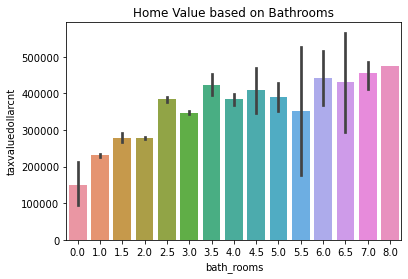

In [8]:
### viz showing value by bathrooms
sns.barplot(data = train, y = 'taxvaluedollarcnt', x = 'bath_rooms')
plt.title('Home Value based on Bathrooms')

**I will now use a chi squared statistical test to investigate whether bathrooms of the home and tax value are related** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

${H_0}$: There is **no** association between bathrooms of the home and its tax value.

${H_a}$: There **is** an association between bathrooms of the home and its tax value.

In [9]:
ez.get_chi_bath(train)

We reject the null hypothesis
chi^2 = 282669.3795
p     = 0.0000


### Chi Squared says Yes 

## Could the number of finished square feet be a driver?

**I will now use a pearsonsr statistical test to investigate whether finished square feet of the home and tax value are related** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

${H_0}$: There is **no** relationship between finished sqaure feet of the home and tax value.

${H_a}$: There **is** a relationship between finished sqaure feet of the home and tax value.

In [10]:
ez.get_stats_sqft(train)

We reject the null hypothesis
pearsonsr test = 0.2752


### PearsonsR says Yes 

## Could the year of when home was built be a driver?

**I will now use a pearsonsr statistical test to investigate whether the year the home was built and tax value are related** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

${H_0}$: There is **no** relationship between year built of the home and tax value.

${H_a}$: There **is** a relationship between year built of the home and tax value.

In [11]:
ez.get_stats_built(train)

We reject the null hypothesis
pearsonsr test = 0.2152


### PearsonsR says Yes 

## Could the number of bedrooms be a driver?

Text(0.5, 1.0, 'Home Value based on Bedrooms')

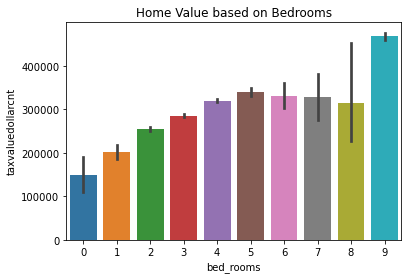

In [12]:
### viz showing value by bedrooms
# key take away from this viz is that it looks
# almost linear until we reach 5 bedrooms
# then there looks like a decline in value besides 
# clear outlier of 9 bedrooms
sns.barplot(data = train, y = 'taxvaluedollarcnt', x = 'bed_rooms')
plt.title('Home Value based on Bedrooms')

**I will now use a chi squared statistical test to investigate whether the bedrooms of the home and tax value are related** 

* I will use a confidence interval of 95% 
* The resulting alpha is .05<br>

${H_0}$: There is no **linear** relationship between bedrooms of the home and tax value.

${H_a}$: There is a **linear** relationship between bedrooms of the home and tax value.

In [13]:
#chi squared
ez.get_chi_bed(train)

We reject the null hypothesis
chi^2 = 174454.4700
p     = 0.0000


#### Chi Squared says Yes

### Exploration Summary

* Top 4 in the Kbest results were selected as features to investigate:
    * bathrooms
    * finished sqft
    * year home was built
    * bedrooms
    
* PearsonsR and Chi Squared statistical tests supported significance amongst the relationships between the 4 features and target variable.  

### Creating predictive models

#### Features included: 

* "bathrooms", "finished sqft", "year built" - Features that had the most significance in relationship to the target variable are most likely going to model the best predictive power.

#### Features not included:

* "bedrooms" - Feature had the weakest relationship to the target variable. 

## MODEL

In [14]:
# Actual column matches taxvaldollarcnt column
# These are the actual figures from our training set
# that will be used to make predictions from
mz.predictions(train)

,Actual
40174,169587.0
28703,206900.0
6134,97875.0
17001,379756.0
30568,527700.0


## Simple Linear Regression Model

In [15]:
# Creates simple linear model that takes in 
# the train and validate sets and returns 
# coefficients and intercept points
mz.simple_lm_model(train,validate)

finished_sqft       43.394773
year_built         718.528925
bath_rooms       20393.405448
dtype: float64


## Lasso Lars Regression Model

In [16]:
# Creates lasso lars model that takes in 
# the train and validate sets and returns 
# coefficients and intercept points
mz.lasso_model(train,validate)

finished_sqft       43.268612
year_built         714.146945
bath_rooms       20342.313084
dtype: float64


## Generalized Linear Regression Model

In [17]:
# Creates generalized linear model that takes in 
# the train and validate sets and returns 
# coefficients and intercept points
mz.glm_model(train,validate)

finished_sqft      57.339299
year_built        858.899942
bath_rooms       3300.462751
dtype: float64


### Evaluate Models on Train data

In [18]:
# Calculating the
    # Sum of Squared Errors
    # Mean Squared Errors
    # Root of Mean Squared Errors
# for the baseline predictions

mz.baseline_mean_errors(train)

SSE: 590692063797269.4 
MSE:  26887526232.29 
RMSE:  163974.16


In [19]:
# Calculating the
    # Sum of Squared Errors
    # Mean Squared Errors
    # Root of Mean Squared Errors
# for the lars predictions

mz.lars_errors(train)

SSE: 537857179361946.4 
MSE:  24482551748.46 
RMSE:  156469.01


In [22]:
# Calculating the
    # Sum of Squared Errors
    # Mean Squared Errors
    # Root of Mean Squared Errors
# for the glm predictions

mz.glm_errors(train)

SSE: 539093206706790.56 
MSE:  24538814088.34 
RMSE:  156648.7


In [23]:
# Calculating the
    # Sum of Squared Errors
    # Mean Squared Errors
    # Root of Mean Squared Errors
# for the ols predictions

mz.lm_errors(train)

SSE: 537856500143301.6 
MSE:  24482520831.32 
RMSE:  156468.91


   ## Keep Calm 
   ### & 
   ## Evaluate On

In [24]:
# Create Dataframes for visual comparison
y_train = pd.DataFrame(train.taxvaluedollarcnt)
y_validate = pd.DataFrame(validate.taxvaluedollarcnt)
y_test = pd.DataFrame(test.taxvaluedollarcnt)

In [25]:
# Place our baseline predictions in the new dataframe
# for safe keeping
taxVal_pred_mean = train.taxvaluedollarcnt.mean()
y_train['taxVal_pred_mean'] = taxVal_pred_mean
y_validate['taxVal_pred_mean'] = taxVal_pred_mean

In [24]:
# RMSE of baseline predictions on train & validate
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt,
                                y_train.taxVal_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt,
                                   y_validate.taxVal_pred_mean) ** (1/2)

In [25]:
# Here we can compare the baseline results from the training 
# sample set versus the validate sample set
# not very much difference in the errors
print("RMSE Baseline Results\nTrain/Sample Set: ", round(rmse_train, 2), 
      "\nValidate/Sample Set: ", round(rmse_validate, 2))

RMSE Baseline Results
Train/Sample Set:  163974.16 
Validate/Sample Set:  161692.14


In [26]:
# This Awesome Function that creates a complex dataframe is here because:
#    a. It totally wanted to show itself off
#    b. It refused to cooperate in the model file

def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [27]:
# Create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# Nab those safe baseline predictions from earlier
metric_df = make_metric_df(y_validate.taxvaluedollarcnt,
                           y_validate.taxVal_pred_mean,
                           'mean_baseline',
                          metric_df)
# Voila
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,161692.143042,1.110223e-16


In [28]:
# Adding the validate results for the Ols model 
metric_df = metric_df.append({
    'model': 'SimpleLinear', 
    'RMSE_validate': mean_squared_error(validate.taxvaluedollarcnt, validate.lm_predictions),
    'r^2_validate': explained_variance_score(validate.taxvaluedollarcnt, validate.lm_predictions)}, ignore_index=True)
# Voila
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,1.616921e+05,1.110223e-16
1,SimpleLinear,2.385740e+10,8.743712e-02


In [29]:
# Adding the validate results for the LassoLars model
metric_df = metric_df.append({
    'model': 'LassoLars', 
    'RMSE_validate': mean_squared_error(validate.taxvaluedollarcnt, validate.lars_predictions),
    'r^2_validate': explained_variance_score(validate.taxvaluedollarcnt, validate.lars_predictions)}, ignore_index=True)
# Voila
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,1.616921e+05,1.110223e-16
1,SimpleLinear,2.385740e+10,8.743712e-02
2,LassoLars,2.385735e+10,8.743876e-02


In [30]:
# Adding the validate results for the Tweedie model
metric_df = metric_df.append({
    'model': 'GeneralizedLinear', 
    'RMSE_validate': mean_squared_error(validate.taxvaluedollarcnt, validate.glm_predictions),
    'r^2_validate': explained_variance_score(validate.taxvaluedollarcnt, validate.glm_predictions)}, ignore_index=True)
# Voila
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,1.616921e+05,1.110223e-16
1,SimpleLinear,2.385740e+10,8.743712e-02
2,LassoLars,2.385735e+10,8.743876e-02
3,GeneralizedLinear,2.388970e+10,8.620069e-02


## Modeling Summary

* The LassoLars model performed very similar to the SimpleLinear model on validate data set 
    * 735
    * 740
    
* The Glm models performance landed in last place
    * Had the highest RMSE score of the 3 models
    
    
* The ideal model is expected to have the lowest RMSE in comparison.
    * For this reason LassoLars model will now be fit to the test data set 

### Proceeded with LassoLars model on Test data

In [39]:
lars = LassoLars(alpha=1).fit(x_test, y_test)
y_test['lars_predictions'] = lars.predict(x_test)
rmse_test = mean_squared_error(y_test.taxvaluedollarcnt, y_test.lars_predictions) ** (1/2)
print("RMSE for LassoLars Model Test-Sample Performance: ", rmse_test)

RMSE for LassoLars Model Test-Sample Performance:  154213.43095431986


### Conclusions

* Lasso Lars Regression model RMSE scores:

        * 1.564690e+10 on training data samples
        * 2.385735e+10 on validate data samples
        * 1.542134e+10 on test data samples

### Key Takeaway

#### Lasso Lars model out performed baseline model on train data set and the test data set. 

### Recommendations

   * Consider eliminating outliers through and through  
   * Consider deeper dive investigation on bedrooms
   * Use bedrooms feature in future modeling
   * Consider the strategy to predict on transformed bathroom feature
       to account for half bath computation